In [1]:
import keras
from keras.layers import Input, Conv2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from keras.models import Model, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
    
import numpy as np

x_train = np.load("data/all_input_128.npy").astype(np.float32)
y_train = np.load("data/all_output_128.npy").astype(np.float32)
print ('x_train', x_train.shape) #320000 x 128 x 128: 128 -- size of maps, 3200000: number data points

# np.save("data/small_input.npy", x_train[:300,:,:])
# np.save("data/small_output.npy", y_train[:300,:,:])

# x_train = np.load("data/small_input.npy").astype(np.float32)
# y_train = np.load("data/small_output.npy").astype(np.float32)

n_train = 13000
N = x_train.shape[1]
x_train = x_train[:n_train, :, :]
y_train = y_train[:n_train, :, :]

x_train (14700, 128, 128)


In [2]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

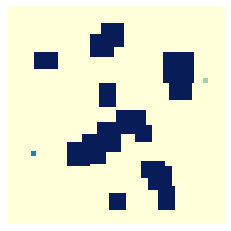

In [3]:
ax = sns.heatmap(x_train[0].T, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False, square=True)


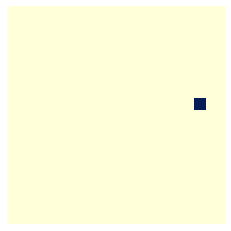

In [4]:
ay = sns.heatmap(y_train[0].T, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False, square=True)

In [5]:
import tensorflow as tf
x = Input(shape=(N, N, 1))

net = Conv2D(filters=64, kernel_size=[3, 3], strides=[1, 1], padding="same", kernel_initializer='orthogonal', activation='relu')(x)
net = BatchNormalization()(net)
# for i in range(19):
for i in range(10):
    net = Conv2D(filters=64, kernel_size=[3, 3], strides=[1, 1], padding="same", kernel_initializer='orthogonal', activation='relu')(net)
    net = BatchNormalization()(net)

net = Conv2D(filters=1, kernel_size=[3, 3], strides=[1, 1], padding="same", kernel_initializer='orthogonal', activation='sigmoid')(net)
net = BatchNormalization()(net)	
net = Dropout(0.10)(net)

model = Model(inputs=x,outputs=net)
model.summary()

early_stop = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
# save_weights = ModelCheckpoint(filepath='weights_2d.hf5', monitor='val_acc',verbose=1, save_best_only=True)

print('Train network ...')
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse',metrics=['accuracy'])

# model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
model.fit(x_train.reshape(n_train,N,N,1), y_train.reshape(n_train,N,N,1), batch_size=64, validation_split=1/14, epochs=50, verbose=1)
print('Save trained model ...')
model.save("128_model_2d_12.hf5")

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      36928 

2022-02-14 00:57:32.086594: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-14 00:57:32.086657: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ubuntu20
2022-02-14 00:57:32.086670: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ubuntu20
2022-02-14 00:57:32.086869: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 465.19.1
2022-02-14 00:57:32.086913: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 465.19.1
2022-02-14 00:57:32.086923: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 465.19.1
2022-02-14 00:57:32.087379: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in 

Train network ...
Epoch 1/50


KeyboardInterrupt: 

In [3]:
import os.path as op
model = load_model("128_model_2d_12.hf5")
arr_dir = "/home/xiao/Projects/ST_LSTM_MP/Data/2D_map/Map_array"
train_paths = np.load(op.join(arr_dir, "train_path.npy"))
maz = np.load(op.join(arr_dir, "maz.npy"))
maz = np.rint(maz/255.0)
maz = maz * 2 - 1 #convert the value range [0, 1] to [-1, 1]

print ('maz', maz.shape)
print ('train_paths', train_paths.shape)

2022-02-13 16:15:41.417433: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-02-13 16:15:41.417489: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: ubuntu20
2022-02-13 16:15:41.417500: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: ubuntu20
2022-02-13 16:15:41.417643: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 465.19.1
2022-02-13 16:15:41.417679: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 465.19.1
2022-02-13 16:15:41.417688: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 465.19.1
2022-02-13 16:15:41.418502: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in 

maz (120, 128, 128)
train_paths (160000, 22, 2)


In [4]:
for i in range(10):
    print (train_paths[i,0], train_paths[i, -1] )

[116  43] [15 86]
[108 125] [35 96]
[38 31] [94 78]
[ 98 124] [32 14]
[32 60] [100  11]
[ 1 41] [116  26]
[37 41] [125  56]
[53 35] [ 23 106]
[91 11] [100 115]
[ 85 121] [5 7]


In [34]:
radius = 1
def augment_state(aug_state, curr_maz, v, r):
    
    for row in range(aug_state[0]-r, aug_state[0]+r+1):
        for col in range(aug_state[1]-r, aug_state[1]+r+1):
            if 0 <= row < N and 0 <= col < N and curr_maz[0, row, col, 0]!= 1:
                curr_maz[0, row, col, 0] = v
    return curr_maz

In [35]:
def collision_detection(state1, state2, curr_maz): #curr_maz shape: (1, N, N , 1)
    
    distance = np.sqrt(np.sum(np.square(state1 - state2)))
    check_interval = 0.2
    check_num = int(distance//check_interval)
    x = np.linspace(state1[0], state2[0], check_num)
    y = np.linspace(state1[1], state2[1], check_num)
#     print (x.shape)
    for i in range(x.shape[0]):
        if curr_maz[0, int(x[i]), int(y[i]), 0] == 1.0:
            return True
    return False
    

In [36]:
def reach_goal(state1, state2): #state1 in the region of state2
    region_radius = 2
    if np.sum(np.absolute(state1-state2))<=region_radius:
        return True
    else:
        return False
    

In [38]:
#Path Construction

import tensorflow as tf
import time
maz_id = 0
path_id = 400
max_itr = 400
start_v = -0.33
goal_v = 0.33
workspace = np.copy(maz[maz_id])
all_paths = []
all_iterations = []
all_times = []
success = 0
fail = 0
#1450
# for path_id in range(1600, 1700):
# for path_id in range(1710, 1722):
for path_id in range(10):
    start_time = time.time()
    # init_state = np.copy(train_configs[maz_id, path_id])
    curr_state = train_paths[maz_id * 1600 + path_id, 0]
    goal_state = train_paths[maz_id * 1600 + path_id, -1]
    
    print ('start/goal states', curr_state, goal_state)
    #environments with augmented goal state and w/o start state
    workspace = workspace.reshape(1,N,N,1)
    img_task = augment_state(goal_state, np.copy(workspace), goal_v, radius) 

    #update the curr_task with respect to the robot state
    curr_task = augment_state(curr_state, np.copy(img_task), start_v, radius)
    path = [curr_state]

    for i in range(max_itr):
        pred_prob = model(curr_task)
        pred_sample = np.unravel_index(np.argsort(pred_prob[0,:,:,0], axis=None)[::-1], (N,N))
    #     pred_sample = tf.argsort(pred_prob[0,:,:,0], direction="DESCENDING")
        pred_sample = np.stack(pred_sample, axis=-1)

        for s in pred_sample:
            flag = False
            for p in path: #check the waypoint already exists in the path
                if p[0] == s[0] and p[1] == s[1]:
                    flag = True
                    break
                    
            if not collision_detection(path[-1], s, workspace) and not flag:#if no collision and not used
                path.append(s)
                curr_task = augment_state(s, np.copy(img_task), start_v, radius)
                break
                
#         if not collision_detection(path[-1], goal_state, workspace):
#             print ('connect to goal')
#             path.append(goal_state)
#             break
                
        if reach_goal(path[-1], goal_state):
            path.append(goal_state)
            break
    print ('path', path)
    all_paths.append(path)
    if (path[-1] == goal_state).all():
        success += 1
        print ('success', path_id)
    else:
        fail += 1
        print ('fail', path_id)
    
    all_iterations.append(i)
    all_times.append(time.time()-start_time)
    
print ('the time cost', sum(all_times))
print ('success', success)
print ('fail', fail)
print ('path length', sum([len(p) for p in all_paths]))
    
    
    
    
    

start/goal states [116  43] [15 86]
path [array([116,  43]), array([121,  48]), array([116,  53]), array([121,  58]), array([60, 60]), array([14, 84]), array([16, 84]), array([16, 85]), array([15, 86])]
success 0
start/goal states [108 125] [35 96]
path [array([108, 125]), array([107, 127]), array([109, 127]), array([111, 127]), array([113, 127]), array([115, 127]), array([117, 127]), array([118, 127]), array([123, 123]), array([127, 123]), array([127, 121]), array([127, 119]), array([127, 117]), array([127, 115]), array([127, 113]), array([127, 111]), array([127, 109]), array([127, 107]), array([127, 105]), array([127, 103]), array([127, 101]), array([127,  99]), array([127,  97]), array([127,  95]), array([127,  93]), array([127,  91]), array([127,  89]), array([127,  87]), array([127,  85]), array([34, 96]), array([35, 96])]
success 1
start/goal states [38 31] [94 78]
path [array([38, 31]), array([44, 36]), array([48, 42]), array([55, 40]), array([62, 39]), array([95, 75]), array([9

In [446]:
success = 0
min_len = np.inf
min_idx = 0
for i in range(len(all_paths)):
    if len(all_paths[i]) > 0:
        success += 1
        if len(all_paths[i]) < min_len:
            min_len = len(all_paths[i])
            min_idx = i
        
print ('success rate', success/10)
print ('avg ite', sum(all_iterations)/10)
print ('avg time', sum(all_times)/10)
print ('min idx', min_idx)
print ('min len', min_len)

success rate 1.0
avg ite 34.1
avg time 1.0256676435470582
min idx 9
min len 5


In [39]:
vis_id =4#89#47#54#23
path = np.array(all_paths[vis_id])
print (path)

[[ 32  60]
 [ 99  11]
 [100  11]]


In [40]:
print ('collision detection', collision_detection(np.array([0, 104]),np.array([114,109]), workspace))

collision detection True


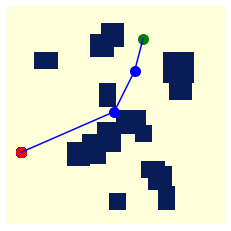

In [69]:
path = train_paths[26]
# path = [[ 60, 34],[86, 74],[57,  24],[60,  8]]
# path = [[14,  2], [17,  3], [17,  4], [19,  4], [22,  3], [55, 58], [58, 60]]
# path = [path[i] for i in [0,1,3,4]]
# path = [[90,14],[ 60,34],[123,102],[122,102]]
# path = [[90,14],[ 60,34],[100,76],[122,102]]
# plt.imshow(test_seen_video[map_id,task_id,0])
vis_env = workspace[0,:,:,0]
# plt.imshow(vis_env.T)
sns.heatmap(vis_env.T, cmap="YlGnBu", cbar=False, square=True)#, xticklabels=False, yticklabels=False)

plt.axis('off')
# plt.gca().invert_yaxis()
# plt.gca().invert_xaxis()
# plt.gca().invert_yaxis()
x = [x for x,y in path]
y = [y for x,y in path]

plt.plot(x,y, '-', color='blue')

plt.scatter(x[1:-1], y[1:-1], s=100, color='blue', marker='o')
plt.scatter(x[0], y[0], s=100, color='green', marker='o')
plt.scatter(x[-1], y[-1], s=100, color='red', marker='o')

plt.show()




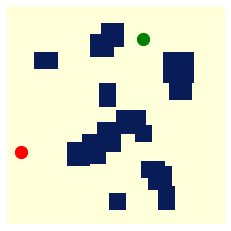

In [99]:
# node 0
img_task = np.copy(workspace)
curr_task = augment_state(path[-1], np.copy(workspace), goal_v, 1) 
curr_task = augment_state(path[0], np.copy(curr_task), start_v, 1)
sns.heatmap(img_task[0,:,:,0].T, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False, square=True)
# plt.plot(x[0], y[0], 'ro', color='green')
# plt.plot(x[-1], y[-1], 'ro', color='red')
plt.scatter(x[0], y[0], s=150, color='green', marker='o')
plt.scatter(x[-1], y[-1], s=150, color='red', marker='o')
plt.show()

0.38


<AxesSubplot:>

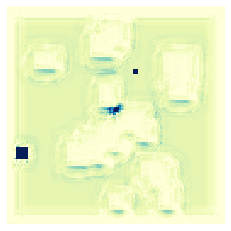

In [86]:
output1 = model(curr_task)
# output1 = np.array(output1[0,:,:,0])
output1 = np.array(output1)
output1 = augment_state(path[1], output1, 0.38,1)
# output1 = augment_state(path[-1], output1, 0,5)

output1 = output1[0,:,:,0]


# sns.heatmap(vis_env.T, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False, square=True)
# plt.axis('off')
# plt.imshow(output1.T)
print(output1[path[1,0],path[1,1]])
sns.heatmap(output1.T, cbar=False,cmap="YlGnBu",vmin=0.01, vmax=0.06, xticklabels=False, yticklabels=False, square=True)

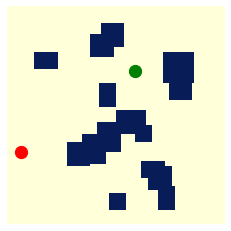

In [98]:
# node 1
img_task = np.copy(workspace)
curr_task = augment_state(path[-1], np.copy(workspace), goal_v, 1) 
curr_task = augment_state(path[1], np.copy(curr_task), start_v, 1)
sns.heatmap(img_task[0,:,:,0].T, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False, square=True)
# plt.plot(x[0], y[0], 'ro', color='green')
# plt.plot(x[-1], y[-1], 'ro', color='red')
plt.scatter(x[1], y[1], s=150, color='green', marker='o')
plt.scatter(x[-1], y[-1], s=150, color='red', marker='o')
plt.show()

0.25


<AxesSubplot:>

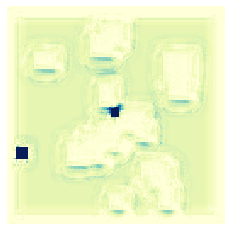

In [96]:
output1 = model(curr_task)
# output1 = np.array(output1[0,:,:,0])
output1 = np.array(output1)
output1 = augment_state(path[2], output1, 0.25,2)
# output1 = augment_state(path[-1], output1, 0,5)
output1 = output1[0,:,:,0]
# sns.heatmap(vis_env.T, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False, square=True)
# plt.axis('off')
# plt.imshow(output1.T)
print(output1[path[2,0],path[2,1]])
sns.heatmap(output1.T,  cbar=False, cmap="YlGnBu",vmin=0.01, vmax=0.06, xticklabels=False, yticklabels=False, square=True)

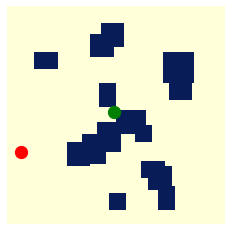

In [97]:
# node 2
img_task = np.copy(workspace)
curr_task = augment_state(path[-1], np.copy(workspace), goal_v, 1) 
curr_task = augment_state(path[2], np.copy(curr_task), start_v, 1)
sns.heatmap(img_task[0,:,:,0].T, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False, square=True)
# plt.plot(x[0], y[0], 'ro', color='green')
# plt.plot(x[-1], y[-1], 'ro', color='red')
plt.scatter(x[2], y[2], s=150, color='green', marker='o')
plt.scatter(x[-1], y[-1], s=150, color='red', marker='o')
plt.show()

<AxesSubplot:>

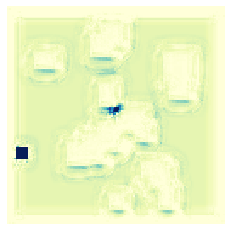

In [95]:
output1 = model(curr_task)
# output1 = np.array(output1[0,:,:,0])
output1 = np.array(output1)
# output1 = augment_state(path[1], output1, 0.41,2)
# output1 = augment_state(path[-1], output1, 0,5)
output1 = output1[0,:,:,0]
# sns.heatmap(vis_env.T, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False, square=True)
# plt.axis('off')
# plt.imshow(output1.T)
sns.heatmap(output1.T, cbar=False,cmap="YlGnBu",vmin=0.01, vmax=0.06, xticklabels=False, yticklabels=False, square=True)

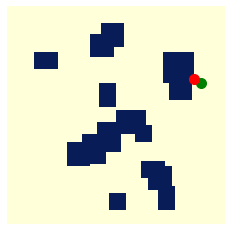

In [235]:
# node 2
img_task = np.copy(workspace)
curr_task = augment_state(path[-1], np.copy(workspace), goal_v, 1) 
curr_task = augment_state(path[3], np.copy(curr_task), start_v, 1)
sns.heatmap(img_task[0,:,:,0].T, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False, square=True)
# plt.plot(x[0], y[0], 'ro', color='green')
# plt.plot(x[-1], y[-1], 'ro', color='red')
plt.scatter(x[3], y[3], s=100, color='green', marker='o')
plt.scatter(x[-1], y[-1], s=100, color='red', marker='o')
plt.show()

<AxesSubplot:>

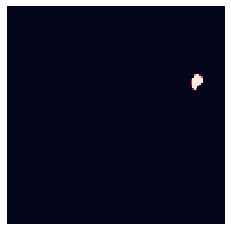

In [236]:
output1 = model(curr_task)
# output1 = np.array(output1[0,:,:,0])
output1 = np.array(output1)
# output1 = augment_state(path[1], output1, 0.41,2)
output1 = output1[0,:,:,0]
# sns.heatmap(vis_env.T, cmap="YlGnBu", cbar=False, xticklabels=False, yticklabels=False, square=True)
# plt.axis('off')
# plt.imshow(output1.T)
sns.heatmap(output1.T, cbar=False, vmin=0.045, vmax=0.06,xticklabels=False, yticklabels=False, square=True)